In [3]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
# load dataset
df = pd.read_csv("../data/heart.csv")

In [78]:
target_var = "HeartDisease"
numeric_cols_all = ["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak"]
categoric_cols_all = ["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]

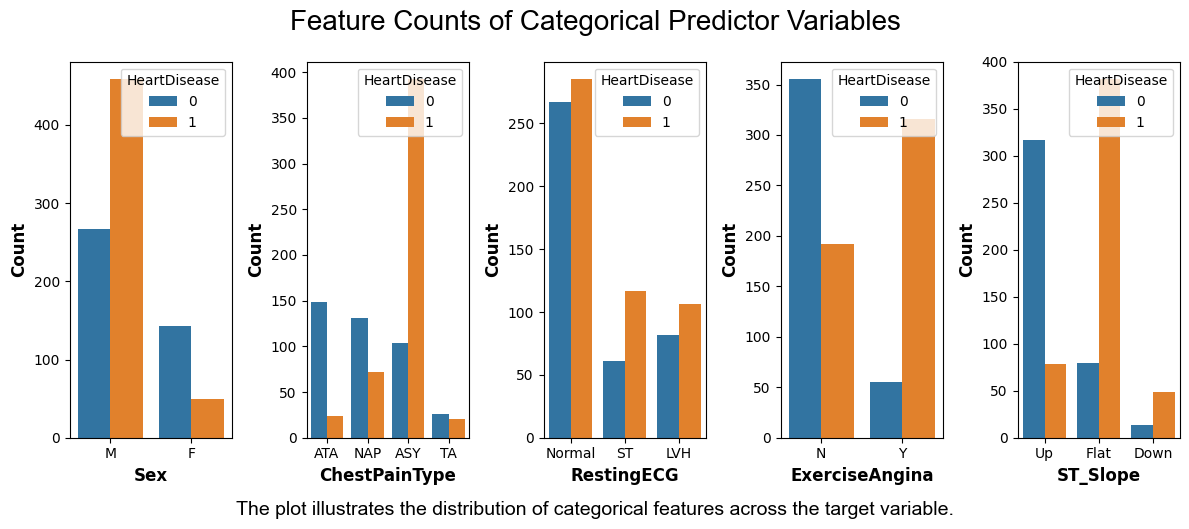

In [83]:
# Counting feature values across target variable: Univariate analysis
cat_predictor_vars = categoric_cols_all
fh, axs = plt.subplots(ncols=5,figsize=(12, 5))

for i in np.arange(5):
    sns.countplot(data=df,hue = target_var,x=cat_predictor_vars[i],ax= axs[i])
    axs[i].set_xlabel(cat_predictor_vars[i],fontsize=12,fontweight='bold')
    axs[i].set_ylabel("Count",fontsize=12,fontweight="bold")
fh.suptitle("Feature Counts of Categorical Predictor Variables",fontsize=20,font="Arial")
# fh.subplots_adjust(bottom=0.3)

# Define the caption text
caption_text = "The plot illustrates the distribution of categorical features across the target variable."
# Add the caption using plt.figtext()
# The coordinates (0.5, 0.01) place the text near the bottom-center of the figure.
# horizontalalignment='center' centers the text horizontally.
# wrap=True ensures the text wraps within the figure boundaries.
plt.figtext(0.5, -0.03, caption_text, wrap=True, horizontalalignment='center', fontsize=14,font="Arial")
plt.tight_layout()
fh.savefig("../figures/feature_counts_categorical_predictors_anup_pillai.png",bbox_inches="tight")

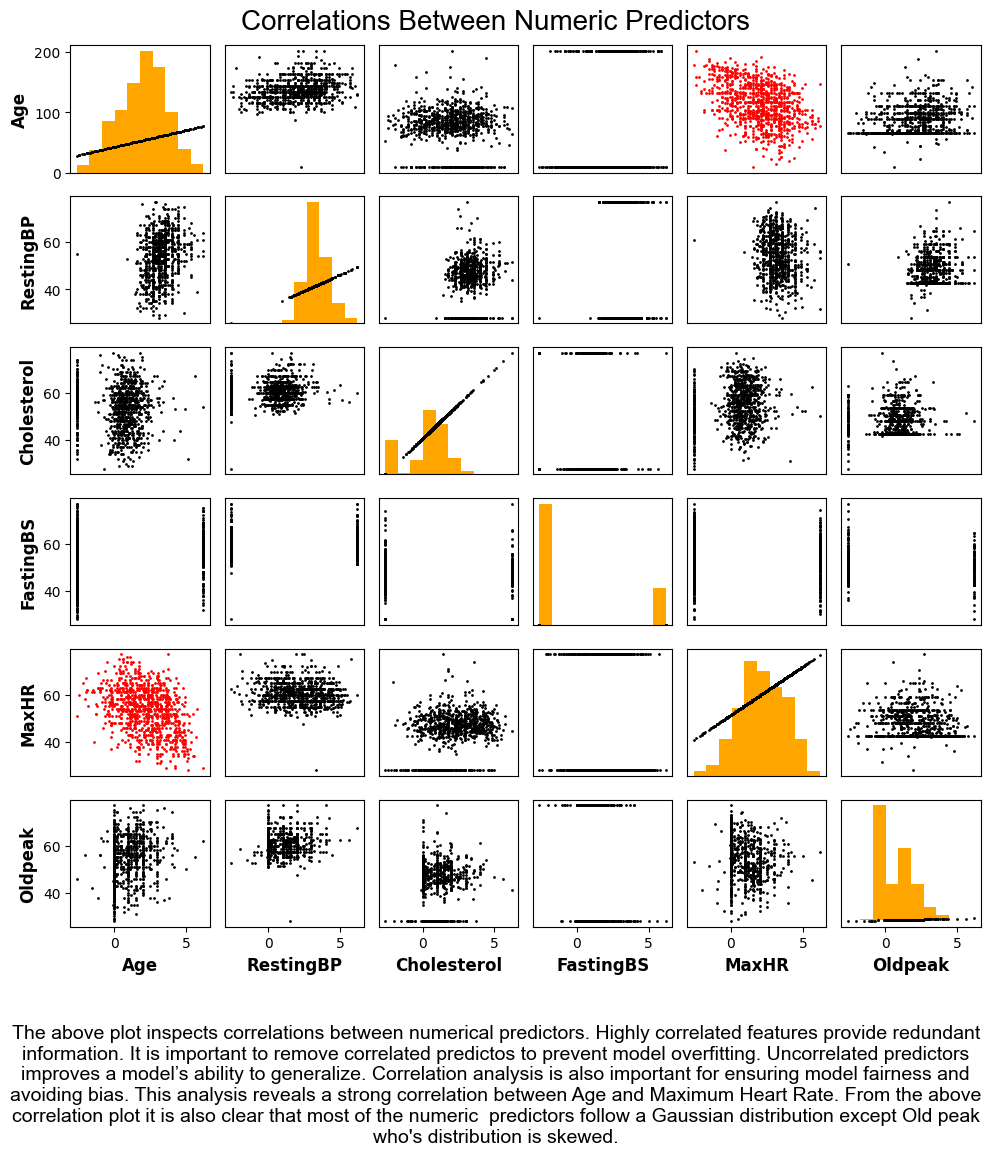

In [206]:
# Inspect correlations between numeric predictors: Bivariate analysis
correlated_predictors = [("Age","MaxHR"),("MaxHR","Age")]
# plt.close('All')
fh, axs = plt.subplots(nrows=6,ncols=6,figsize=(10, 10))
for i in np.arange(6):
    for j in np.arange(6):
        marker_color = "black"
        if ((numeric_cols_all[i],numeric_cols_all[j]) in correlated_predictors):
            marker_color = "red"
        if (i == j):
            axs[i,j].hist(df[numeric_cols_all[i]].values,density=False,color='orange')
            # sns.histplot(df[numeric_cols_all[i]], kde=True,ax=axs[i,j],color='orange')
        axs[i,j].plot(df[numeric_cols_all[i]].values,df[numeric_cols_all[j]],linewidth=0,marker='o',markersize=1,color=marker_color)
        axs[i,j].axes.get_xaxis().set_visible(False)
        axs[i,j].axes.get_yaxis().set_visible(False)
        if(i==5):
            axs[i,j].axes.get_xaxis().set_visible(True)
            axs[i,j].set_xlabel(numeric_cols_all[j],fontsize=12,fontweight="bold")
        if(j==0):
            axs[i,j].axes.get_yaxis().set_visible(True)
            axs[i,j].set_ylabel(numeric_cols_all[i],fontsize=12,fontweight="bold")
fh.suptitle("Correlations Between Numeric Predictors",fontsize=20,font="Arial")
# Define the caption text
caption_text = "The above plot inspects correlations between numerical predictors. \
Highly correlated features provide redundant information. It is important to remove correlated predictos to prevent model overfitting. \
Uncorrelated predictors improves a model’s ability to generalize. Correlation analysis is also important for ensuring model fairness and avoiding bias. \
This analysis reveals a strong correlation between Age and Maximum Heart Rate. From the above correlation plot it is also clear that most of the numeric  \
predictors follow a Gaussian distribution except Old peak who's distribution is skewed."
# Add the caption using plt.figtext()
# The coordinates (0.5, 0.01) place the text near the bottom-center of the figure.
# horizontalalignment='center' centers the text horizontally.
# wrap=True ensures the text wraps within the figure boundaries.
plt.figtext(0.5, -0.15, caption_text, wrap=True, horizontalalignment='center', multialignment='center', fontsize=14,font="Arial")
plt.tight_layout()
fh.savefig("../figures/inspect_correlations_between_numeric_predictors_anup_pillai.png",bbox_inches="tight")

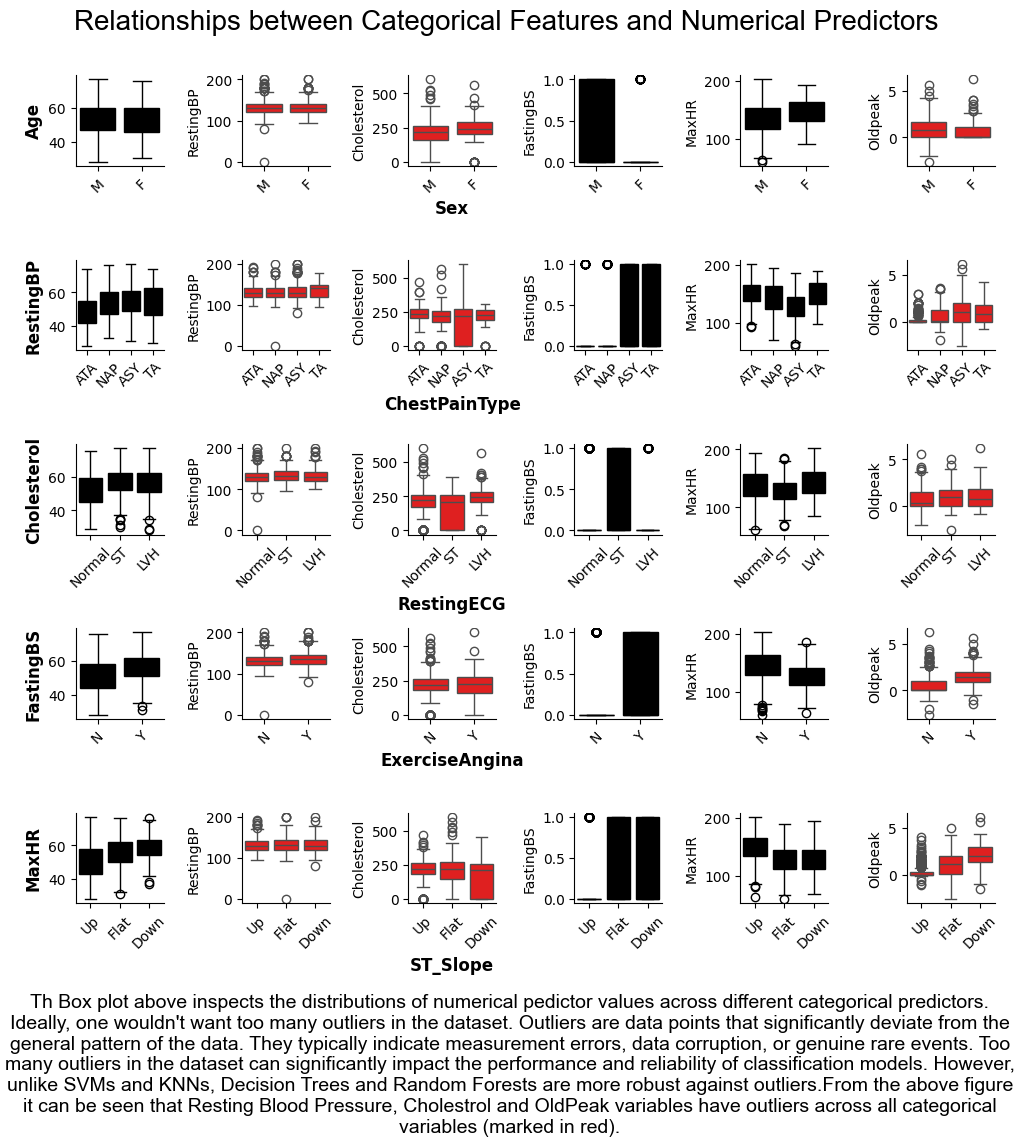

In [196]:
# check outliers in data: BoxPlot
fh, axs = plt.subplots(nrows=5,ncols=6,figsize=(10, 10),tight_layout=True)

outlier_plots = [(0,1),(0,2),(0,5),(1,1),(1,2),(1,5),(2,1),(2,2),(3,1),(3,2),(4,1),(4,2),(2,5),(3,5),(4,5),(5,5)]
for i in np.arange(5):
    axs[i,0].set_ylabel(numeric_cols_all[i],fontsize=12,fontweight="bold")
    for j in np.arange(6):
        marker_color = 'black'
        if ((i,j) in outlier_plots):
            marker_color = "red"
        sns.boxplot(x=categoric_cols_all[i],y=numeric_cols_all[j],data=df,ax=axs[i,j],color=marker_color)
        axs[i,j].spines['top'].set_visible(False)
        axs[i,j].spines['right'].set_visible(False)
        # axs[i,j].axes.get_xaxis().set_visible(False)
        axs[i,j].set_xlabel(None)
        labels = axs[i,j].get_xticklabels()
        # axs[i,j].set_xticklabels(labels, rotation=45, ha='right')
        axs[i,j].tick_params(axis='x', labelrotation=45)
        if(j==2):
            axs[i,j].axes.get_xaxis().set_visible(True)
            axs[i,j].set_xlabel(categoric_cols_all[i],fontsize=12,fontweight='bold')
        # axs[i,j].axes.get_yaxis().set_visible(False)
fh.suptitle("Relationships between Categorical Features and Numerical Predictors \n",fontsize=20,font="Arial")
# Define the caption text
caption_text = "Th Box plot above inspects the distributions of numerical pedictor values across different categorical predictors. \
Ideally, one wouldn't want too many outliers in the dataset. Outliers are data points that significantly deviate from the general pattern of the data. \
They typically indicate measurement errors, data corruption, or genuine rare events. \
Too many outliers in the dataset can significantly impact the performance and reliability of classification models. \
However, unlike SVMs and KNNs, Decision Trees and Random Forests are more robust against outliers.\
From the above figure it can be seen that Resting Blood Pressure, Cholestrol and OldPeak variables have outliers across all \
categorical variables (marked in red)."
# Add the caption using plt.figtext()
# The coordinates (0.5, 0.01) place the text near the bottom-center of the figure.
# horizontalalignment='center' centers the text horizontally.
# wrap=True ensures the text wraps within the figure boundaries.
plt.figtext(0.5, -0.14, caption_text, wrap=True, horizontalalignment='center', multialignment='center',fontsize=14,font="Arial")
plt.tight_layout()
fh.savefig("../figures/inspect_relationships_between_categorical_features_numeric_predictors_anup_pillai.png",bbox_inches="tight")